In [41]:
# problem: remove ab aggregates from single positive EVs
# target: 0 for ab aggregates, 1 for EV (classification)

In [42]:
import pandas as pd
%matplotlib inline 
import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

In [43]:
#AB fitting with curve_fit, bins need to be 200!

path = r'~/Downloads/data file/antibody aggregates-control.csv'
df=pd.read_table(path)

#discard headers
df_new = df.loc[13:] # 14 for single file, 13 for 'total' file
#print(df_new.head()) #debug
#df1=df_new.columns.str.split(',', expand=True)
df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
# print(df1.head())
# print(df1.index[0])
df1=df1.drop(df1.index[0])
# print(df1.head())
df1=df1.reset_index(drop=True)
df1 = df1[df1.columns].astype(float)

rslt_df_0 = df1[(df1['Channel 1 binned counts'] >= 3 )| (df1['Channel 2 binned counts'] >= 3)]  #channel 1 or 2 positive
radius = rslt_df_0[rslt_df_0['radius_of_gyration']<300]['radius_of_gyration']
print('interested particle numbers for ab aggregates')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

interested particle numbers for ab aggregates
2226
median radius of interested particle numbers
18.7336


(array([239., 825., 453., 149.,  88.,  70.,  50.,  38.,  34.,  24.,  24.,
         19.,  16.,  13.,  12.,  10.,   9.,   8.,  14.,   9.,  10.,  13.,
          8.,   5.,   7.,  18.,   4.,   3.,   4.,   4.,   4.,   3.,   5.,
          3.,   4.,   5.,   4.,   4.,   5.,   0.,   0.,   3.,   3.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  8.343956  ,  13.30308388,  18.26221176,  23.22133964,
         28.18046752,  33.1395954 ,  38.09872328,  43.05785116,
         48.01697904,  52.97610692,  57.9352348 ,  62.89436268,
         67.85349056,  72.81261844,  77.77174632,  82.7308742 ,
         87.69000208,  92.64912996,  97.60825784, 102.56738572,
        107.5265136 , 112.48564148, 117.44476936, 122.40389724,
        127.36302512, 132.322153  , 137.28128088, 142.24040876,
        147.19953664, 152.15866452, 157.1177924 , 162.07692028,
        167.03604816, 171.99517604, 176.95430392, 181.9134318 ,
        186.87255968, 191.83168756, 196.79081544, 201.74994332,
        206.709071

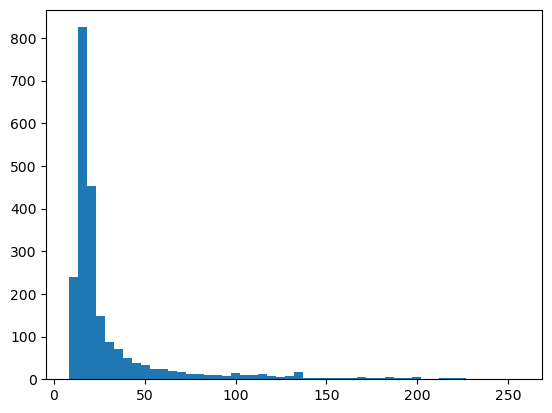

In [44]:
plt.hist(radius,bins=50)

In [45]:
#label ab aggregates as 0 for classification

rslt_df_0=rslt_df_0.reset_index(drop=True)
# rslt_df_0=rslt_df_0.drop('index', axis=1)
rslt_df_0['label'] = [0]*len(rslt_df_0)

In [46]:
#EV
df=pd.read_table(r'~/Downloads/data file/EV sample total 2.csv')


df_new = df.loc[13:] # 14 for single file, 13 for 'total' file
#print(df_new.head()) #debug
#df1=df_new.columns.str.split(',', expand=True)
df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df2 = df1[df1.columns].astype(float)

rslt_df_1 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 1&2 positive
radius = rslt_df_1[rslt_df_1['radius_of_gyration']<300]['radius_of_gyration']
# radius = rslt_df['radius_of_gyration']
print(len(rslt_df_1))
print('median radius of interested particle numbers')
print(radius.median())
chan_1_2 = len(radius)

12367
median radius of interested particle numbers
43.701496


(array([2.900e+01, 1.810e+02, 4.540e+02, 8.040e+02, 1.183e+03, 1.208e+03,
        1.096e+03, 9.660e+02, 8.370e+02, 7.220e+02, 5.710e+02, 4.420e+02,
        4.120e+02, 3.630e+02, 2.900e+02, 3.010e+02, 2.340e+02, 2.570e+02,
        2.350e+02, 1.840e+02, 1.700e+02, 1.620e+02, 1.540e+02, 1.410e+02,
        1.370e+02, 1.100e+02, 9.300e+01, 9.200e+01, 8.800e+01, 9.100e+01,
        6.200e+01, 5.500e+01, 5.700e+01, 3.300e+01, 2.900e+01, 1.600e+01,
        2.100e+01, 2.400e+01, 1.400e+01, 7.000e+00, 7.000e+00, 1.100e+01,
        6.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 5.000e+00,
        2.000e+00, 2.000e+00]),
 array([  7.3404956 ,  11.71949229,  16.09848898,  20.47748566,
         24.85648235,  29.23547904,  33.61447573,  37.99347242,
         42.3724691 ,  46.75146579,  51.13046248,  55.50945917,
         59.88845586,  64.26745254,  68.64644923,  73.02544592,
         77.40444261,  81.7834393 ,  86.16243598,  90.54143267,
         94.92042936,  99.29942605, 103.67842274, 108.05

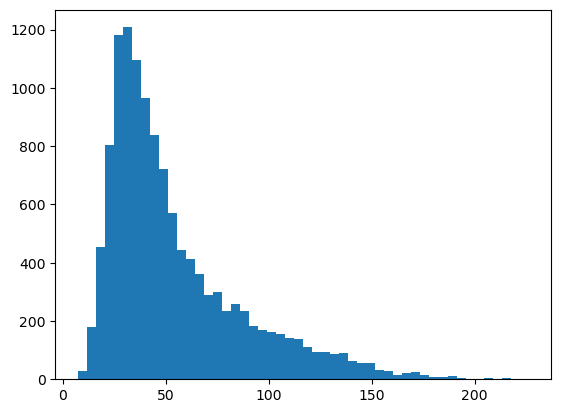

In [47]:
plt.hist(radius,bins=50)

In [48]:
#label EV as 1 for classification

rslt_df_1=rslt_df_1.reset_index(drop=True)
# rslt_df_1=rslt_df_1.drop('index', axis=1)
rslt_df_1['label'] = [1]*len(rslt_df_1)

In [49]:
# split 1 double positive particle to 2 single positive particle and change the feature value
import random
import copy

# rslt_df_1_1 = pd.DataFrame()
rslt_df_1_1 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_1['Channel 2 binned counts'] = random_numbers
rslt_df_1_1['Channel 2 positive'] = 0

# rslt_df_1_1 = pd.DataFrame()
rslt_df_1_2 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_2['Channel 1 binned counts'] = random_numbers
rslt_df_1_2['Channel 1 positive'] = 0

In [50]:
n_0 = int(len(rslt_df_0)*4/5)
n_1 = int(len(rslt_df_1)*4/5)

In [51]:
train_0 = rslt_df_0.iloc[:n_0,:]
# train_1 = rslt_df_1.iloc[:n_1,:]
train_2 = rslt_df_1_1.iloc[:n_1,:]
train_3 = rslt_df_1_2.iloc[:n_1,:]
train_total = pd.concat([train_0,train_2,train_3]).reset_index(drop=True)
# train = train_total.sample(frac=1, random_state=42).reset_index(drop=True)
train = train_total

In [52]:
test_0 = rslt_df_0.iloc[n_0:,:]
# test_1 = rslt_df_1.iloc[n_1:,:]
test_2 = rslt_df_1_1.iloc[n_1:,:]
test_3 = rslt_df_1_2.iloc[n_1:,:]
test_total = pd.concat([test_0,test_2,test_3]).reset_index(drop=True)
# test = test_total.sample(frac=1, random_state=42).reset_index(drop=True)
test = test_total

In [54]:
import matplotlib.pylab as plt
%matplotlib inline

In [55]:
# from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.base import TransformerMixin

class Transformer():

    def __init__(self):
        self.mean = 0
    
    def fit(self, X, y=None):
        '''
        Get mean
        Input: X datafrome
        '''
        
    def transform(self, X, y=None):
        '''
        Transform data and fill na with mean
        Input: X dataframe
        '''
        df = pd.DataFrame()
        
        df['num_localisations']=X['num_localisations']
        df['skew']=X['skew']
        df['circularity']=X['circularity']
        df['density']=X['density']
        df['convex_hull_area']=X['convex_hull_area']
        df['discretised_area']=X['discretised_area']
        df['radius_of_gyration']=X['radius_of_gyration']
        df['length']=X['length']
        df['distance_birth']=X['distance_birth']
        df['distance_death']=X['distance_death']
        df['Channel 1 binned counts'] = X['Channel 1 binned counts']
        df['Channel 2 binned counts'] = X['Channel 2 binned counts']

        
        return df

    
    def fit_transform(self, X, y=None):
        '''
        Combine fit and transform
        Input: X dataframe
        '''        
        self.fit(X)
        return self.transform(X)
          

In [56]:
# df_copy.tail(20)
features = list(train.columns)
target = 'label'
features.remove(target)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

class_weights = {0: 1, 1: 1}
# class_weight=class_weights

pipeline = Pipeline(steps=[
    ('tf', Transformer()),
    ('scaler', MinMaxScaler()),       # Apply MinMaxScaler
#     ('regressor', RandomForestRegressor())
    ('regressor', RandomForestClassifier(class_weight='balanced'))
])



In [58]:
# Fit the pipeline
pipeline.fit(X_train, y_train)
# print(pipeline[2].coef_)

import matplotlib.pylab as plt
%matplotlib inline

'''Train'''

y_train_pred = pipeline.predict(X_train).astype(int)
# plt.scatter(y_train, y_train_pred, alpha=0.3)

'''Test'''

y_test_pred = pipeline.predict(X_test).astype(int)
# plt.scatter(y_test, y_test_pred, alpha=0.3)


In [59]:
from sklearn.metrics import accuracy_score

# Compute accuracy score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print accuracy score
print("Accuracy:", accuracy_train)
print("Accuracy:", accuracy_test)

Accuracy: 1.0
Accuracy: 0.989247311827957


In [60]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_train, y_train_pred)

# Print classification report
print(report)

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print classification report
print(report)

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm1 = confusion_matrix(y_train, y_train_pred)
cm2 = confusion_matrix(y_test, y_test_pred)


# Print confusion matrix
print(cm1)
print(cm2)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1781
           1       1.00      1.00      1.00     19786

    accuracy                           1.00     21567
   macro avg       1.00      1.00      1.00     21567
weighted avg       1.00      1.00      1.00     21567

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       446
           1       0.99      1.00      0.99      4948

    accuracy                           0.99      5394
   macro avg       0.97      0.96      0.96      5394
weighted avg       0.99      0.99      0.99      5394

[[ 1781     0]
 [    0 19786]]
[[ 408   38]
 [  20 4928]]


In [61]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9

rslt_df1 = df2[(df2['Channel 1 binned counts'] < 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 2 positive
rslt_df2 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] < 3)]  #channel 1 positive
rslt_df = pd.concat([rslt_df1,rslt_df2]).reset_index(drop=True)

radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2/CD9 single positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

X_test_2 = rslt_df[features]
y_test_2 = pipeline.predict(X_test_2)

#calculate the positive percentage as 'EV'
sum(y_test_2)/len(y_test_2)*100


interested particle numbers for channel 2/CD9 single positive
8442
median radius of interested particle numbers
36.0858725


91.6133617626155

In [62]:
# Print accuracy score
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 1.0
Test Accuracy: 0.989247311827957


In [63]:
print('predicted EV percentage from single positive particles:',sum(y_test_2)/len(y_test_2)*100)

predicted EV percentage from single positive particles: 91.6133617626155


In [64]:
# pipeline.predict_proba(X_train)[:, 1]

AUC-ROC Score: 0.9983566762491344


Text(0, 0.5, 'true positive rate')

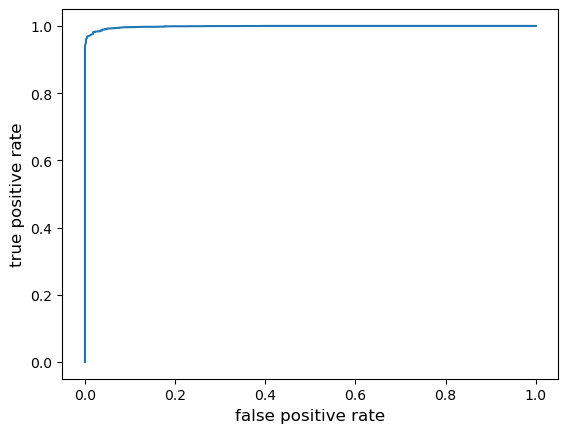

In [65]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Make predictions on the train & test set
# y_pred_prob_train = pipeline.predict_proba(X_train)[:, 1]
y_pred_prob_test = pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_prob_test)

print("AUC-ROC Score:", auc_roc_score)

# roc_auc_score(y_train, y_train_proba[:, 1])

# roc_auc_score(y_test, y_test_proba[:, 1])

fpr_rf, tpr_rf, thresholds_rf_1 = metrics.roc_curve(y_test, y_pred_prob_test)

plt.plot(fpr_rf,tpr_rf)

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

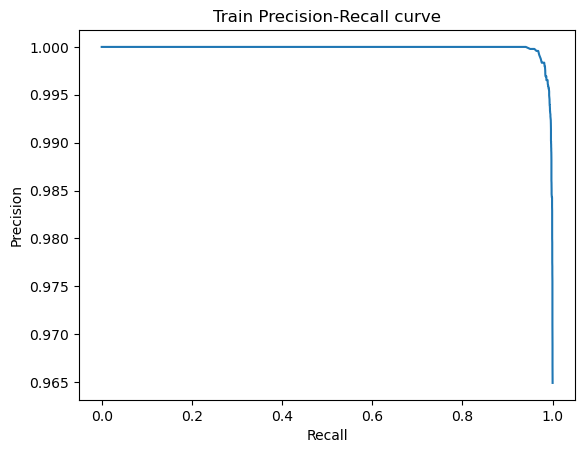

In [66]:
from sklearn.metrics import precision_recall_curve

precision_rf, recall_rf, thresholds_rf_2 = precision_recall_curve(y_test, y_pred_prob_test)
plt.plot(recall_rf, precision_rf)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [67]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9

#channel 2
rslt_df1 = df2[(df2['Channel 1 binned counts'] < 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 2 positive
#channel 1
rslt_df2 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] < 3)]  #channel 1 positive
rslt_df = rslt_df2

radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 1/CD81 single positive')
chan_1 = len(radius)
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

X_test_2 = rslt_df[features]
y_test_2 = pipeline.predict(X_test_2)

#calculate the positive percentage as 'EV'
print('predicted EV percentage from single positive particles at channel 1:',sum(y_test_2)/len(y_test_2)*100)
# sum(y_test_2)/len(y_test_2)*100
chan_1_pos = sum(y_test_2)

interested particle numbers for channel 1/CD81 single positive
4126
median radius of interested particle numbers
30.155511
predicted EV percentage from single positive particles at channel 1: 99.87881725642268


In [68]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9

#channel 2
rslt_df1 = df2[(df2['Channel 1 binned counts'] < 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 2 positive
#channel 1
rslt_df2 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] < 3)]  #channel 1 positive
rslt_df = rslt_df1

radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2/CD9 single positive')
chan_2 = len(radius)
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

X_test_2 = rslt_df[features]
y_test_2 = pipeline.predict(X_test_2)

#calculate the positive percentage as 'EV'
sum(y_test_2)/len(y_test_2)*100
chan_2_pos = sum(y_test_2)

print('predicted EV percentage from single positive particles at channel 2:',sum(y_test_2)/len(y_test_2)*100)


interested particle numbers for channel 2/CD9 single positive
4316
median radius of interested particle numbers
46.528043499999995
predicted EV percentage from single positive particles at channel 2: 83.71177015755329


In [69]:
total = chan_1_pos + chan_2_pos + chan_1_2

print('after correction')
print('double positive percentage:')
print('single positive percentage at channel 1 647:')
print('single positive percentage at channel 2 488:')
print(f"{(chan_1_2/total):.2f}")
print(f"{(chan_1_pos/total):.2f}")
print(f"{(chan_2_pos/total):.2f}")



after correction
double positive percentage:
single positive percentage at channel 1 647:
single positive percentage at channel 2 488:
0.62
0.21
0.18


In [70]:
total = chan_1 + chan_2 + chan_1_2

print('before correction')
print('double positive percentage:')
print('single positive percentage at channel 1 647:')
print('single positive percentage at channel 2 488:')
print(f"{(chan_1_2/total):.2f}")
print(f"{(chan_1/total):.2f}")
print(f"{(chan_2/total):.2f}")



before correction
double positive percentage:
single positive percentage at channel 1 647:
single positive percentage at channel 2 488:
0.59
0.20
0.21


In [71]:
import shap

model_rf=pipeline.steps[2][1]

X_display1 = pipeline.steps[0][1].transform(X_test)
X_display2 = pipeline.steps[1][1].transform(X_display1)
X_display = pd.DataFrame(X_display2, columns=X_display1.columns)


explainer = shap.Explainer(model_rf)

shap_values = explainer.shap_values(X_display)
sv = explainer(X_display)


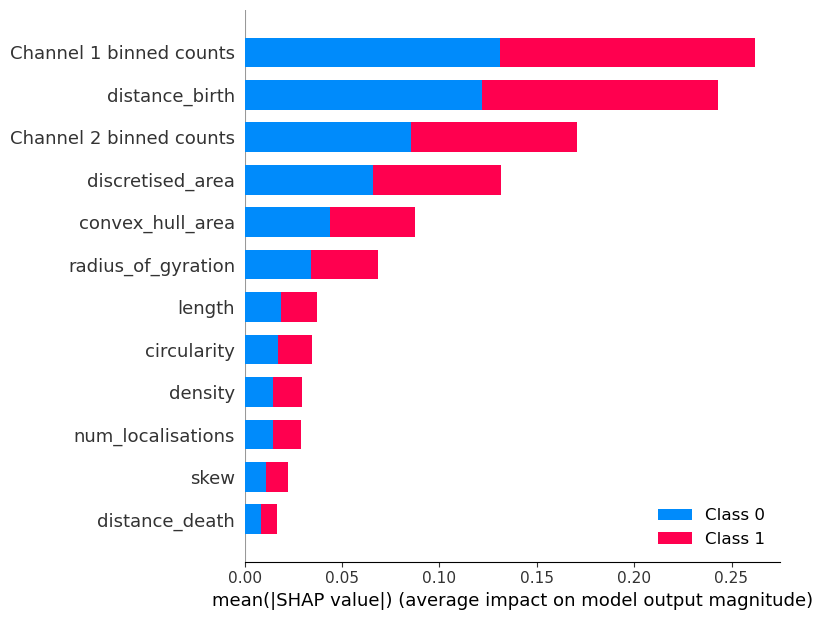

In [72]:
shap.summary_plot(shap_values, X_display)

In [73]:
shap_values[0]

array([[-0.04038334, -0.03138923, -0.05100685, ..., -0.02971044,
         0.13766129,  0.05654074],
       [-0.00872102, -0.01163694, -0.02314282, ..., -0.00480276,
         0.1590707 ,  0.04891366],
       [-0.00899941, -0.01190245, -0.01826374, ..., -0.00934691,
         0.14698916,  0.05038522],
       ...,
       [ 0.00163982, -0.00778249, -0.00705959, ..., -0.0150089 ,
        -0.20184936,  0.02028254],
       [ 0.0050815 , -0.01501018, -0.02392225, ..., -0.00618417,
        -0.22523014,  0.02816813],
       [-0.0110278 , -0.03998972, -0.03705637, ..., -0.00809645,
         0.08784993,  0.00038405]])

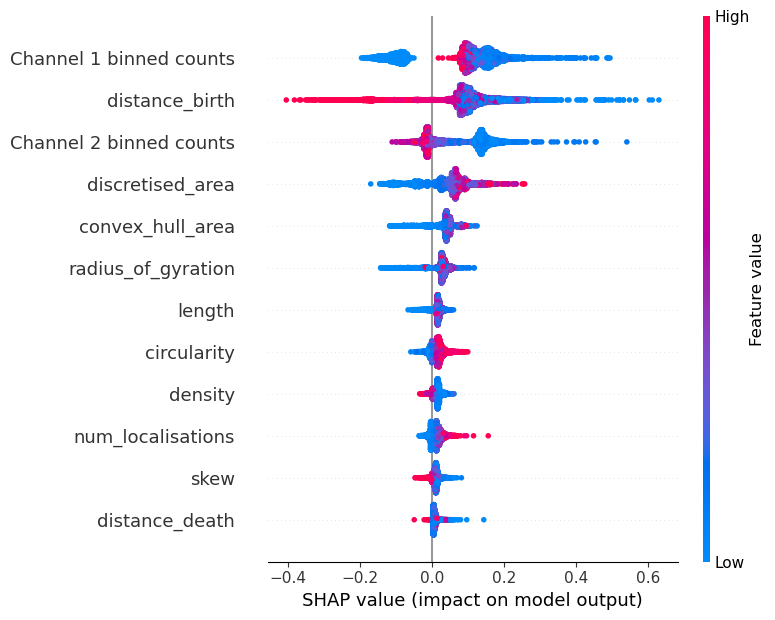

In [74]:
shap.summary_plot(shap_values[1], X_display)

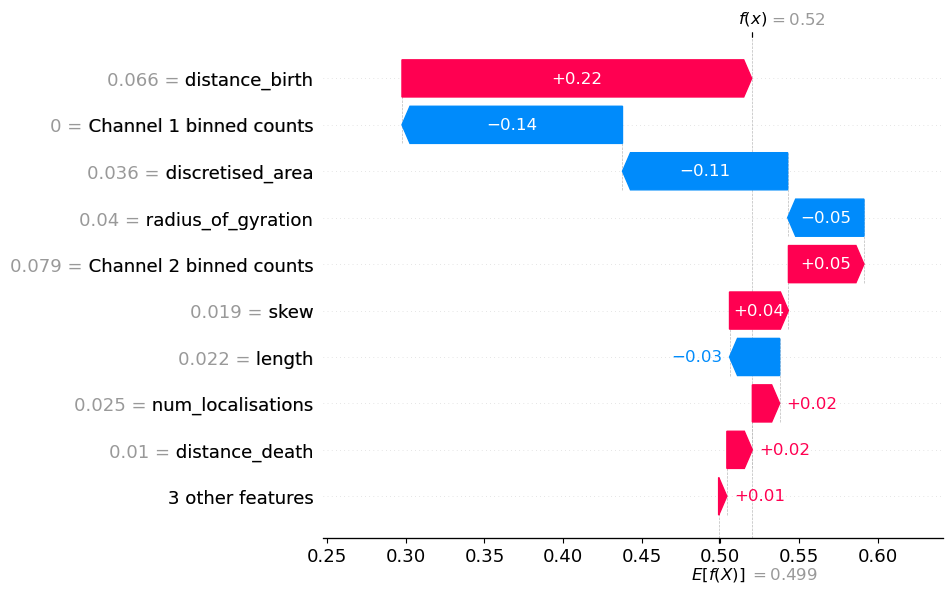

In [75]:
from shap import TreeExplainer, Explanation

exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_display.values, 
                  feature_names=X_display.columns)
idx = 7
shap.plots.waterfall(exp[idx])

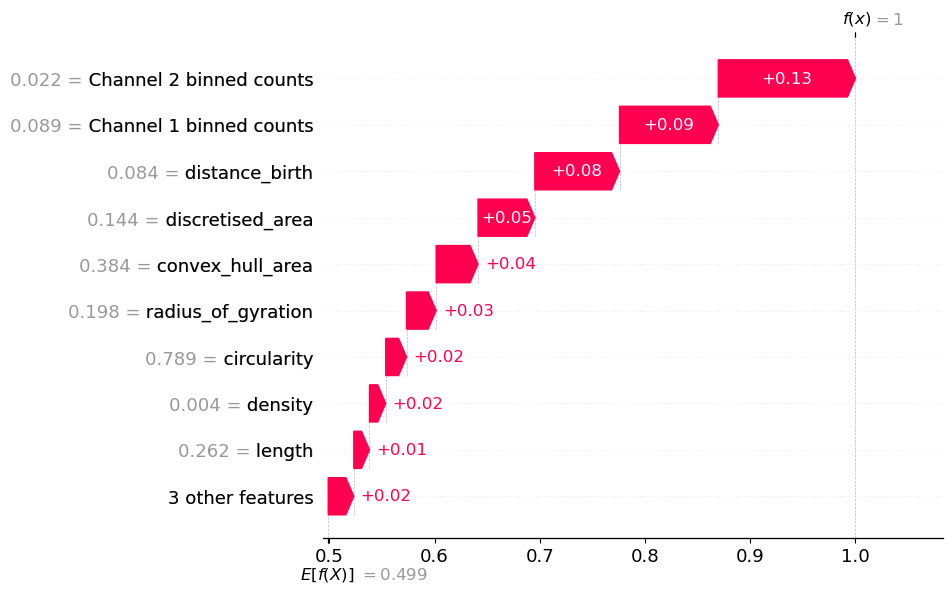

In [76]:
from shap import TreeExplainer, Explanation

exp = Explanation(sv.values[:,:,1], 
                  sv.base_values[:,1], 
                  data=X_display.values, 
                  feature_names=X_display.columns)
idx = 500
shap.plots.waterfall(exp[idx])

In [77]:
%store fpr_rf
%store tpr_rf
%store thresholds_rf_1
%store precision_rf
%store recall_rf
%store thresholds_rf_2


Stored 'fpr_rf' (ndarray)
Stored 'tpr_rf' (ndarray)
Stored 'thresholds_rf_1' (ndarray)
Stored 'precision_rf' (ndarray)
Stored 'recall_rf' (ndarray)
Stored 'thresholds_rf_2' (ndarray)


In [78]:
%store -r fpr_svm
%store -r tpr_svm
%store -r thresholds_svm_1
%store -r precision_svm
%store -r recall_svm
%store -r thresholds_svm_2

In [79]:
%store -r fpr_lg
%store -r tpr_lg
%store -r thresholds_lg_1
%store -r precision_lg
%store -r recall_lg
%store -r thresholds_lg_2

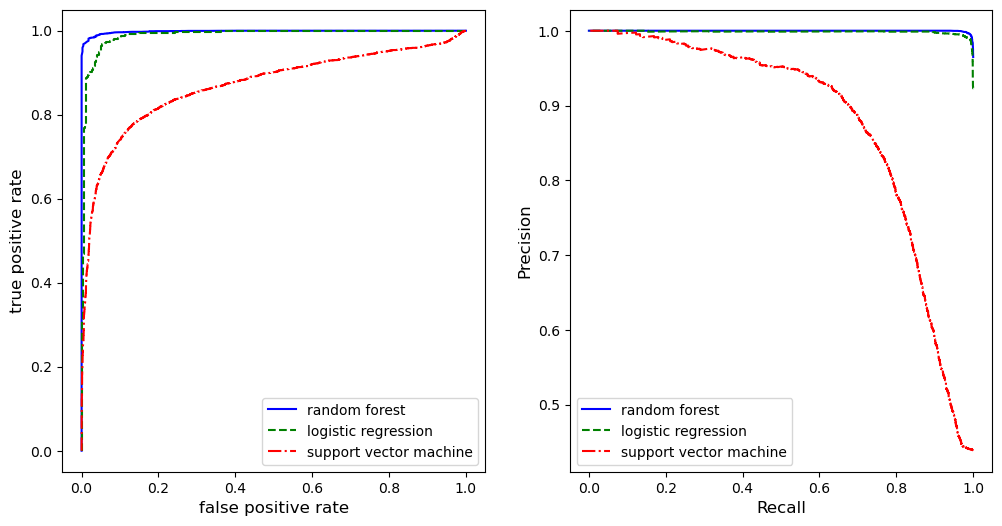

In [80]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_rf,tpr_rf,label='random forest', linestyle='-', color='blue')
plt.plot(fpr_lg,tpr_lg,label='logistic regression', linestyle='--', color='green')
plt.plot(fpr_svm,tpr_svm,label='support vector machine', linestyle='-.', color='red')

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

# # Set the limits for the x and y-axes
# plt.xlim(0, 0.2)  # Set x-axis limits from 2 to 8
# plt.ylim(0.8, 1)  # Set y-axis limits from -1 to 1

plt.legend()

# plt.plot(recall_svm, precision_svm)
# plt.ylabel("Precision")
# plt.xlabel("Recall")
# plt.title("Train Precision-Recall curve");

plt.subplot(1, 2, 2)

plt.plot(recall_rf, precision_rf,label='random forest', linestyle='-', color='blue')
plt.plot(recall_lg, precision_lg,label='logistic regression', linestyle='--', color='green')
plt.plot(recall_svm, precision_svm,label='support vector machine', linestyle='-.', color='red')

plt.ylabel("Precision", fontsize=12)
plt.xlabel("Recall", fontsize=12)


# # Set the limits for the x and y-axes
# plt.xlim(0, 0.2)  # Set x-axis limits from 2 to 8
# plt.ylim(0.8, 1)  # Set y-axis limits from -1 to 1

plt.legend()
